In [391]:
%pylab inline
import csv
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['average', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [392]:
#  return int(np.mean(np.asarray(latency).astype(np.float))/1000)

def read(filename):
    latency = []
    throughput = []
    with open(filename, newline='') as csvfile:
        for row in csv.reader(csvfile):
            if len(row) == 3:
                thr = row[0].rsplit(" ")
                bw = row[1].rsplit(" ")
                lat = row[2].rsplit(" ")
                if len(thr) == 2 and len(bw) == 3 and len(lat) == 11 and lat[9].isdigit() and thr[0].isdigit():
                    latency.append(int(lat[3])/1000)
                    throughput.append(int(thr[0]))
    return (latency, throughput)

def average (arr1,arr2):
    total = 0
    items = 0
    for x,y in zip(arr1,arr2):
        total =+ x*y
        items =+ y
    if items == 0:
        return 0
    else:
        return (total/items)

(2, 15)

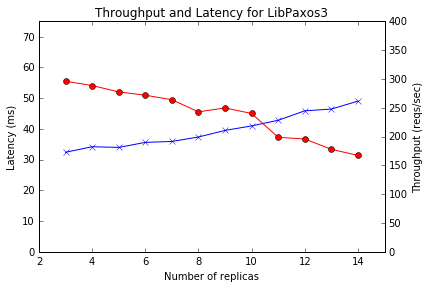

In [401]:
# paxos_data = {}
# paxos_throughput = {}
for n in range(9,15,1):
    maj = int(floor(n/2)+1)
    paxos_data[n], paxos_throughput[n] = read("paxos/client-config_r"+str(n)+"_q"+str(maj)+"_g"+str(n)+".log")   
    
    
replicas = list(range(3,15,1))
avg_latency = []
avg_throughput = []
for n in replicas:
    if len(paxos_data[n]) > 0 and len(paxos_throughput[n]) > 0:
        thr_array = paxos_throughput[n][20:100]
        lat_array = paxos_data[n][20:100]
        avg_latency.append(average(lat_array,thr_array))
        avg_throughput.append(np.mean(thr_array))
        
        
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlim([2,15])

axes.set_xlabel('Number of replicas')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput and Latency for LibPaxos3')

axes.plot(replicas, avg_latency,"bx-")
axes.set_ylim([0,75])

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(replicas, avg_throughput,"ro-")
axes2.set_ylim([0,400])
axes2.set_xlim([2,15])

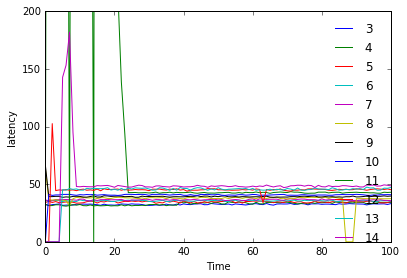

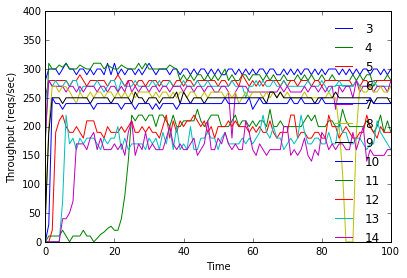

In [402]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel("Time")
axes.set_ylabel("latency")

axes.set_ylim([0,200])
axes.set_xlim([0,100])

lines = list(range(3,15,1))

for n in lines:
    axes.plot(paxos_data[n])
    
axes.legend(lines,loc=1,frameon=False)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel("Time")
axes.set_ylabel("Throughput (reqs/sec)")

axes.set_ylim([0,400])
axes.set_xlim([0,100])

for n in lines:
    axes.plot(paxos_throughput[n])
    
axes.legend(lines,loc=1,frameon=False)

3 p 35.615 271.875
3 1 21.595 445.25
3 2 32.334 298.375
[21.595, 32.334, 35.615]
[0 1 2]
4 p 35.916 264.0
4 1 22.764 424.5
4 2 33.586 290.875
4 3 33.491 291.125
[22.764, 33.586, 33.491, 35.916]
[0 1 2 3]
5 p 37.37 243.0
5 1 24.115 390.625
5 2 34.38 285.25
5 3 34.214 286.875
[24.115, 34.38, 34.214, 37.37]
[0 1 2 3]
6 p 39.512 249.75
6 1 25.527999999999995 374.625
6 2 0 0.0
6 3 34.336 288.5
6 4 35.235 276.5
[25.527999999999995, 0, 34.336, 35.235, 39.512]
[0 1 2 3 4]
7 p 40.981 240.125
7 1 25.631999999999998 374.125
7 2 35.173 273.875
7 3 35.677 273.25
7 4 33.557 285.5
[25.631999999999998, 35.173, 35.677, 33.557, 40.981]
[0 1 2 3 4]
8 p 42.814 198.75
8 1 26.277999999999995 370.625
8 2 36.475 269.0
8 3 36.707 269.5
8 4 37.336 264.375
8 5 37.786 258.75
[26.277999999999995, 36.475, 36.707, 37.336, 37.786, 42.814]
[0 1 2 3 4 5]
9 p 45.896 195.875
9 1 28.261 341.375
9 2 32.437 59.675
9 3 36.942 262.5
9 4 37.393 96.7875
9 5 38.428 253.75
[28.261, 32.437, 36.942, 37.393, 38.428, 45.896]
[0 1 2 3

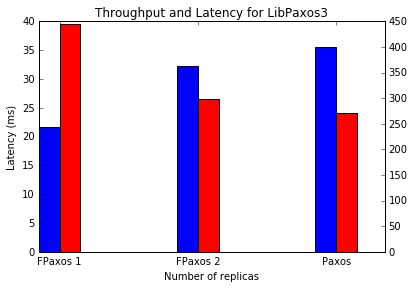

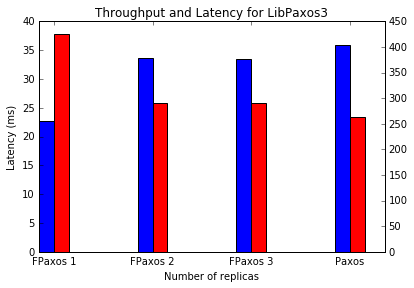

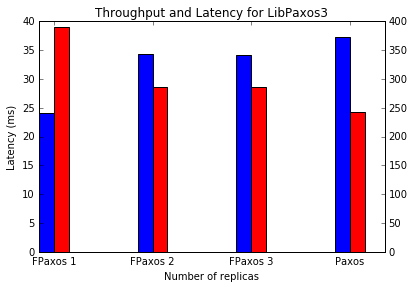

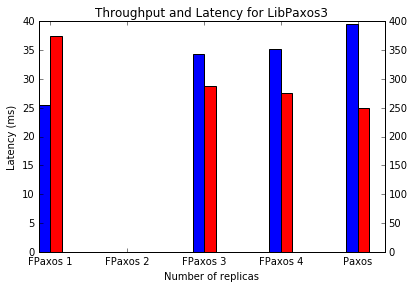

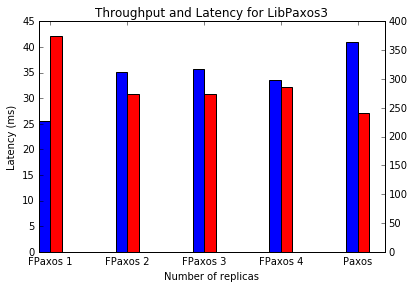

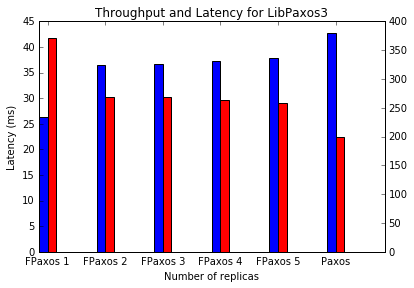

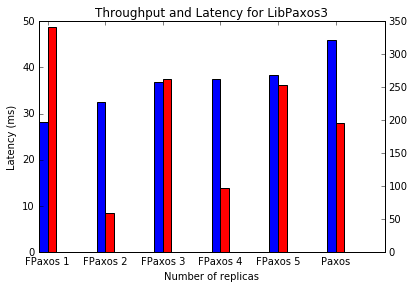

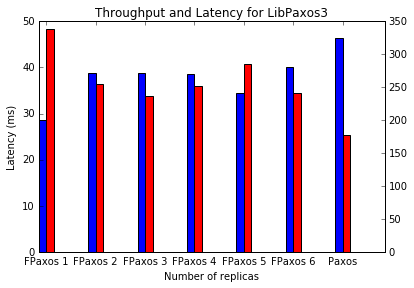

In [434]:
fpaxos_data = {}
fpaxos_throughput = {}

replicas = list(range(3,11,1))

for n in replicas:
    maj = int(floor(n/2)+1)
    fpaxos_data[n] = {}
    fpaxos_throughput[n] = {}
    for q in range(1,maj+1):
         fpaxos_data[n][q], fpaxos_throughput[n][q] = read("fpaxos-results/client-config_r"+str(n)+"_q"+str(q)+"_g"+str(q)+".log")
     
for n in replicas: 
    maj = int(floor(n/2)+1)
    lines = list(range(1,maj+1))
    print(n,"p",avg_latency[n],avg_throughput[n])
    n_latency = []
    n_throughput = []
    labels = []
    for q in lines:
        if len(fpaxos_throughput[n][q]) > 0 and len(fpaxos_data[n][q]) > 0:
            thr_array = fpaxos_throughput[n][q][20:100]
            lat_array = fpaxos_data[n][q][20:100]
            print(n,q,average(lat_array,thr_array),np.mean(thr_array))
            n_latency.append(average(lat_array,thr_array))
            n_throughput.append(np.mean(thr_array))
            labels.append('FPaxos '+str(q))
    
    n_throughput.append(avg_throughput[n])
    n_latency.append(avg_latency[n])
    labels.append('Paxos')
    
    ind = np.arange(maj+1)  # the x locations for the groups
    width = 0.15        
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.set_xlim([0,maj])

    axes.set_xlabel('Number of replicas')
    axes.set_ylabel('Latency (ms)')
    axes.set_title('Throughput and Latency for LibPaxos3')

    print(n_latency)
    print(ind)
    axes.bar(ind, n_latency, width, color="blue")
    
    axes2 = axes.twinx()
    axes2.bar(width + ind, n_throughput, width, color="red")
    
    axes.set_xticks(ind + width)
    axes.set_xticklabels(labels)

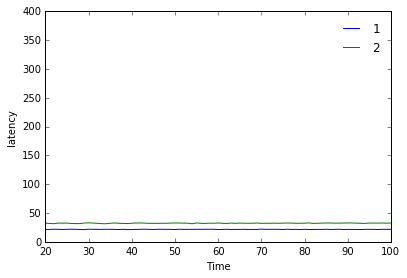

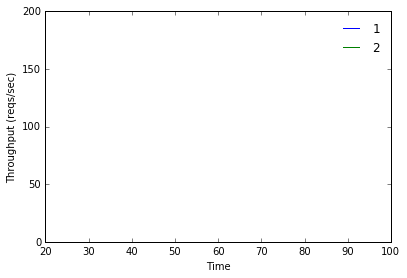

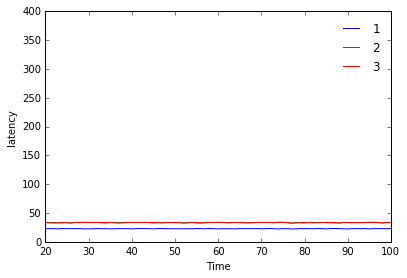

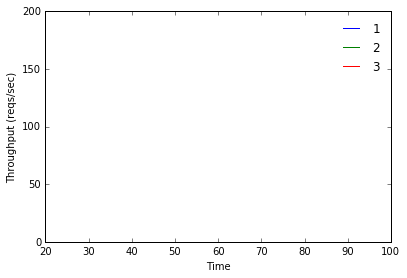

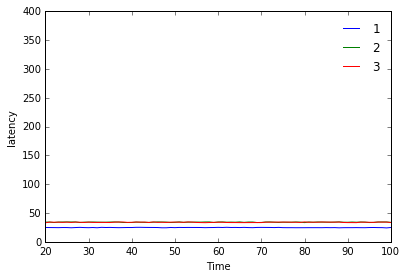

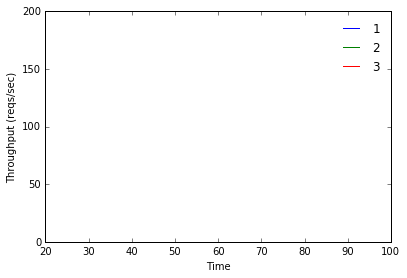

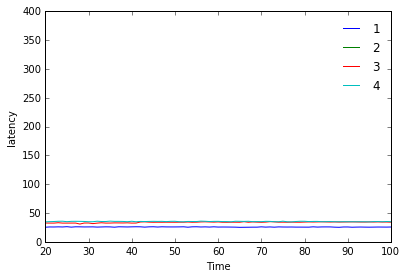

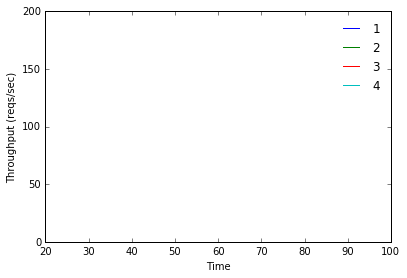

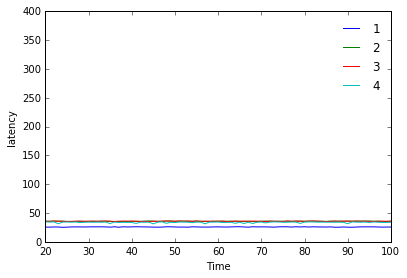

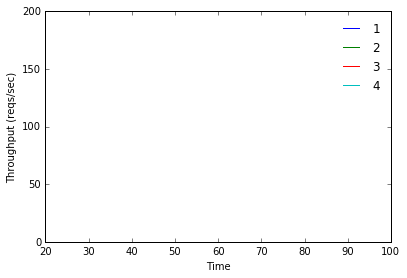

In [406]:
for n in replicas:
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel("Time")
    axes.set_ylabel("latency")

    axes.set_ylim([0,400])
    axes.set_xlim([20,100])

    maj = int(floor(n/2)+1)
    lines = list(range(1,maj+1))

    for q in lines:
        axes.plot(fpaxos_data[n][q])

    axes.legend(lines,loc=1,frameon=False)

    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel("Time")
    axes.set_ylabel("Throughput (reqs/sec)")

    axes.set_ylim([0,200])
    axes.set_xlim([20,100])

    for q in lines:
        axes.plot(fpaxos_throughput[n][q])

    axes.legend(lines,loc=1,frameon=False)